In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('bengaluru_house_prices.csv')
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.area_type.unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [4]:
df.groupby('area_type').count()

,availability,location,size,society,total_sqft,bath,balcony,price
area_type,,,,,,,,
Built-up Area,2418,2418,2418,1215,2418,2410,2310,2418
Carpet Area,87,87,87,54,87,87,82,87
Plot Area,2025,2025,2009,311,2025,2009,1837,2025
Super built-up Area,8790,8789,8790,6238,8790,8741,8482,8790


First drop columns which u feel are not tessential to determine target variable

In [5]:
df1 = df.drop(['area_type', 'availability', 'society'], axis = 1)
df1.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


Next drop rows which have nan values

In [6]:
df1.isna().sum()

location        1
size           16
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [7]:
df2 = df1.dropna(axis = 0).copy() #make a deep copy else later can cause problem

In [8]:
df2.head()

,location,size,total_sqft,bath,balcony,price
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [9]:
np.shape(df2)

(12710, 6)

making size consistent by converting it into int and removing the string part

In [10]:
df2['rooms'] = df2['size'].apply(lambda x : int(x.split(' ')[0]))
df2.head()

,location,size,total_sqft,bath,balcony,price,rooms
0,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,3.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,1.0,51.00,2


In [11]:
df2 = df2.drop(['size'], axis = 1) #now size is of no use as we have rooms columns

In [12]:
df2.rooms.unique()

array([ 2,  4,  3,  1,  6,  8,  7,  5, 11,  9, 27, 43, 14, 12, 10, 13],
      dtype=int64)

In [13]:
df2[df2['rooms'] > 20]

,location,total_sqft,bath,balcony,price,rooms
1718,2Electronic City Phase II,8000,27.0,0.0,230.0,27
4684,Munnekollal,2400,40.0,0.0,660.0,43


We see there is an anomaly as 2400sq ft area cannot have 43 rooms

But before doing anything let's check total_sqft

In [14]:
df2.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

we see we have ranges also 
also first let's make sq_ft consistent

In [15]:
def is_float(x) :
    try :
        float(x)
    except:
        return False
    return True

In [16]:
df3 = df2[~df2['total_sqft'].apply(is_float)]
df3.head()

,location,total_sqft,bath,balcony,price,rooms
30,Yelahanka,2100 - 2850,4.0,0.0,186.000,4
122,Hebbal,3067 - 8156,4.0,0.0,477.000,4
137,8th Phase JP Nagar,1042 - 1105,2.0,0.0,54.005,2
165,Sarjapur,1145 - 1340,2.0,0.0,43.490,2
188,KR Puram,1015 - 1540,2.0,0.0,56.800,2


In [17]:
df3['total_sqft'].unique()

array(['2100 - 2850', '3067 - 8156', '1042 - 1105', '1145 - 1340',
       '1015 - 1540', '34.46Sq. Meter', '1195 - 1440', '1120 - 1145',
       '3090 - 5002', '1160 - 1195', '1000Sq. Meter', '1115 - 1130',
       '520 - 645', '1000 - 1285', '650 - 665', '633 - 666', '5.31Acres',
       '30Acres', '1445 - 1455', '884 - 1116', '850 - 1093',
       '716Sq. Meter', '547.34 - 827.31', '580 - 650', '3425 - 3435',
       '1804 - 2273', '3630 - 3800', '4000 - 5249', '1500Sq. Meter',
       '142.61Sq. Meter', '1574Sq. Yards', '1250 - 1305', '670 - 980',
       '1005.03 - 1252.49', '1004 - 1204', '645 - 936', '2710 - 3360',
       '2830 - 2882', '596 - 804', '1255 - 1863', '1300 - 1405',
       '117Sq. Yards', '934 - 1437', '980 - 1030', '2249.81 - 4112.19',
       '1070 - 1315', '3040Sq. Meter', '500Sq. Yards', '2806 - 3019',
       '613 - 648', '704 - 730', '1210 - 1477', '3369 - 3464',
       '1125 - 1500', '167Sq. Meter', '1076 - 1199', '381 - 535',
       '524 - 894', '540 - 670', '2725 - 3

In [18]:
#drop columns which are of diifernt units

In [19]:
def get_range(x) :
    tokens = x.split(' - ')
    if(len(tokens) == 2) :
        return np.mean([float(tokens[0]), float(tokens[1])])
    try:
        return float(x)
    except:
        return None

In [20]:
df3 = df2.copy()
df3['total_sqft'] = df2['total_sqft'].apply(get_range)
df3.head()

,location,total_sqft,bath,balcony,price,rooms
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [21]:
df3.total_sqft.unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [22]:
df3.total_sqft.isnull().sum()

42

In [23]:
df4 = df3.dropna()
df4.total_sqft.isnull().sum()

0

In [24]:
df4.head()

,location,total_sqft,bath,balcony,price,rooms
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4
2,Uttarahalli,1440.0,2.0,3.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3
4,Kothanur,1200.0,2.0,1.0,51.00,2


In [25]:
df5 = df4.copy()
df5['price_per_sqft'] = df5['price'] * 100000 / df5['total_sqft']
df5.head()

,location,total_sqft,bath,balcony,price,rooms,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,1.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,3.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,3.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,1.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,1.0,51.00,2,4250.000000


In [26]:
len(df5.location.unique())

1259

In [27]:
location_stats = df5['location'].value_counts()
location_stats

location
Whitefield           513
Sarjapur  Road       372
Electronic City      300
Kanakpura Road       259
Thanisandra          230
                    ... 
S R Layout             1
Meenakshi Layout       1
Vidyapeeta             1
Maruthi Extension      1
Abshot Layout          1
Name: count, Length: 1259, dtype: int64

In [28]:
#let us groupby location whose count is less that or equal to 10

In [29]:
len(location_stats[location_stats <= 10])

1024

In [30]:
location_stats_less_that_10 = location_stats[location_stats <= 10]
location_stats_less_that_10

location
Kalkere                 10
Nagappa Reddy Layout    10
Basapura                10
Doddaballapur           10
HAL 2nd Stage           10
                        ..
S R Layout               1
Meenakshi Layout         1
Vidyapeeta               1
Maruthi Extension        1
Abshot Layout            1
Name: count, Length: 1024, dtype: int64

In [31]:
df5.location = df5.location.apply(lambda x : 'other' if x in location_stats_less_that_10 else x)

In [32]:
len(df5.location.unique())

236

In [33]:
df5[df5['location'] == 'other'].head()

,location,total_sqft,bath,balcony,price,rooms,price_per_sqft
18,other,2770.0,4.0,2.0,290.00,3,10469.314079
19,other,1100.0,2.0,2.0,48.00,2,4363.636364
24,other,510.0,1.0,0.0,25.25,1,4950.980392
25,other,1250.0,3.0,2.0,56.00,3,4480.000000
42,other,600.0,1.0,0.0,38.00,1,6333.333333


In [34]:
#now let us remove outliears

In [35]:
#typical sq_ft per bedroom is 300, so removing when area per bedroom is less than 300
df5[df5.total_sqft / df5.rooms < 300].head()

,location,total_sqft,bath,balcony,price,rooms,price_per_sqft
58,Murugeshpalya,1407.0,4.0,1.0,150.0,6,10660.980810
68,other,1350.0,7.0,0.0,85.0,8,6296.296296
70,other,500.0,3.0,2.0,100.0,3,20000.000000
78,Kaval Byrasandra,460.0,1.0,0.0,22.0,2,4782.608696
89,Rajaji Nagar,710.0,6.0,3.0,160.0,6,22535.211268


In [36]:
df6 = df5[~(df5.total_sqft / df5.rooms < 300)]

In [37]:
print(df5.shape)
print(df6.shape)

(12668, 7)
(12013, 7)


In [38]:
df6.price_per_sqft.describe()

count     12013.000000
mean       6206.082347
std        3985.518807
min         267.829813
25%        4199.363057
50%        5252.525253
75%        6823.529412
max      176470.588235
Name: price_per_sqft, dtype: float64

200 per_sqft price is very less and max is too high those both seem to be outliers
so first group by locations as price vary from loaction to location
in a particular location find mean and std deviation something exceeding mean +- std are outliers
assuning normal distribution

In [39]:
def remove_outliers_price_per_sqft(x) :
    subdfs = x.groupby('location')
    df_out = pd.DataFrame() 
    for key,subdf in subdfs :
        mean = np.mean(subdf.price_per_sqft)
        std = np.std(subdf.price_per_sqft)
        correct_data = subdf[(subdf.price_per_sqft > mean - std) & (subdf.price_per_sqft <= mean + std)]
        df_out = pd.concat([df_out, correct_data], ignore_index = True)
    return df_out

In [40]:
df7 = remove_outliers_price_per_sqft(df6)
df7.head()

,location,total_sqft,bath,balcony,price,rooms,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3,3520.000000
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509


In [41]:
df7.shape

(9853, 7)

In [42]:
df7.price_per_sqft.describe()

count     9853.000000
mean      5587.531444
std       2170.486260
min       1250.000000
25%       4225.352113
50%       5142.857143
75%       6355.932203
max      24000.000000
Name: price_per_sqft, dtype: float64

In [43]:
def plot_scatter_price_area(location, x) :
    data_2bhk = x[(x.location == location) & (x.rooms == 2)]
    data_3bhk = x[(x.location == location) & (x.rooms == 3)]
    plt.xlabel('total sqft')
    plt.ylabel('price')
    plt.scatter(data_2bhk.total_sqft, data_2bhk.price, color = 'blue', label = '2BHK', marker = '+')
    plt.scatter(data_3bhk.total_sqft, data_3bhk.price, color = 'green', label = '3BHK', marker = '*')
    plt.title(location)
    plt.legend()

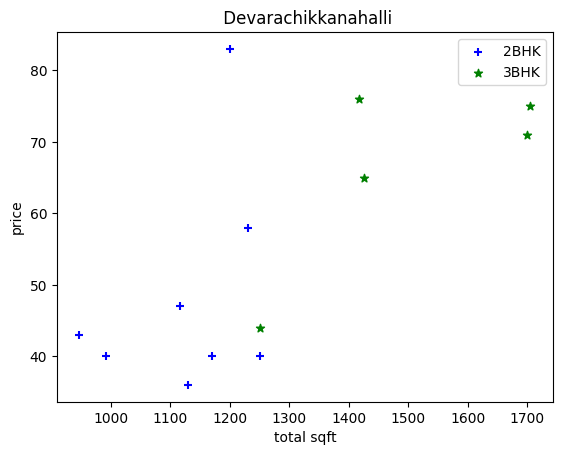

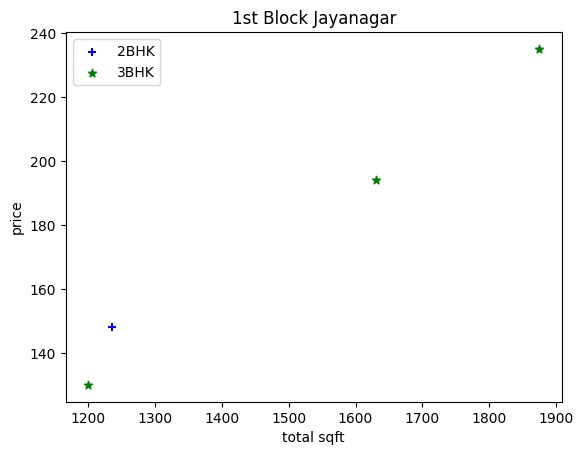

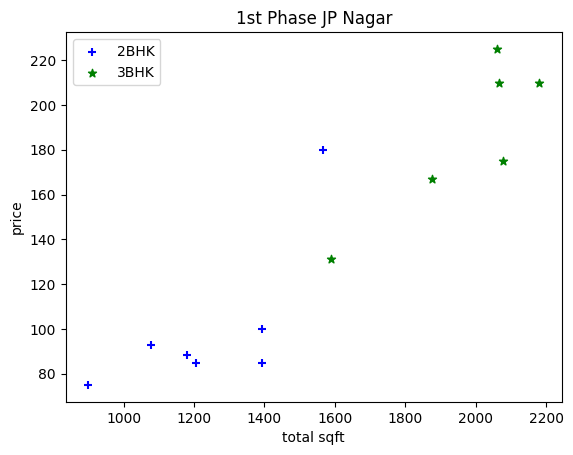

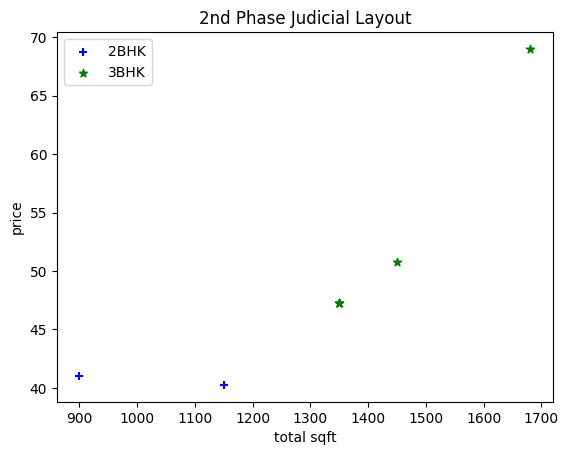

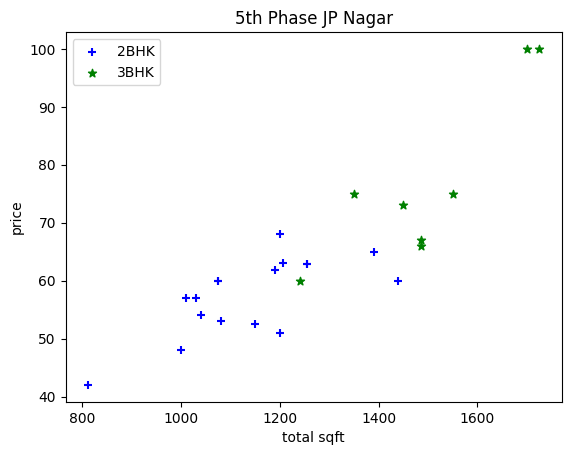

In [44]:
valid_locations = df7.groupby('location')['rooms'].apply(lambda x : (2 in x.values) and (3 in x.values))
top_loc = valid_locations[valid_locations].index[:5]
for loc in top_loc :
    plot_scatter_price_area(loc, df7)
    plt.show()

remove where price of 2bhk is more that 3bhk for given area and location

In [45]:
df7.rooms.unique()

array([ 3,  2,  4,  1,  6,  5,  8,  7,  9, 11, 13], dtype=int64)

In [46]:
def drop_outliers_sqft(x) :
    subdfs = x.groupby('location')
    to_drop_indices = np.array([]) #creating an empty array
    for location, subdf in subdfs :
        bhk_stats = {} #a dictionary
        for bhk, bhk_dfs in subdf.groupby('rooms'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_dfs.total_sqft),
                'std_dev' : np.std(bhk_dfs.total_sqft),
                'count' : bhk_dfs.shape[0]
            }
        for bhk, bhk_dfs in subdf.groupby('rooms'):
            if bhk_stats[bhk]['count'] < 5 :
                continue
            for compare_bhk in bhk_stats:
                if compare_bhk == bhk or bhk_stats[compare_bhk]['count'] < 5:
                    continue
                if bhk > compare_bhk : #tsf total sqft
                    mean_tsf = bhk_stats[compare_bhk]['mean']
                    outliers = bhk_dfs[bhk_dfs.total_sqft < mean_tsf]
                    to_drop_indices = np.append(to_drop_indices, outliers.index.values)
                elif bhk < compare_bhk :
                    mean_tsf = bhk_stats[compare_bhk]['mean']
                    outliers = bhk_dfs[bhk_dfs.total_sqft > mean_tsf]
                    to_drop_indices = np.append(to_drop_indices, outliers.index.values)
    return x.drop(to_drop_indices, axis = 'index')

In [47]:
df7.shape

(9853, 7)

In [48]:
df8 = drop_outliers_sqft(df7)
df8.shape

(9388, 7)

In [49]:
df8.head()

,location,total_sqft,bath,balcony,price,rooms,price_per_sqft
0,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3,3520.000000
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,3200.000000
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,6916.666667
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,3418.803419
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,4561.403509


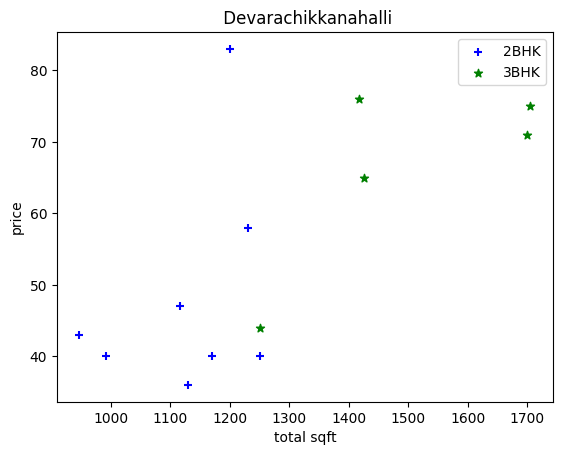

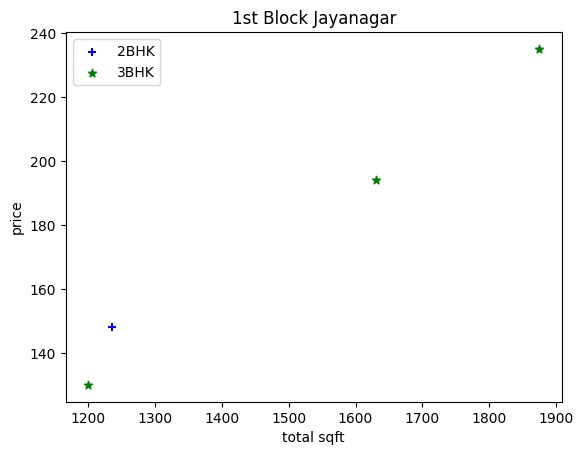

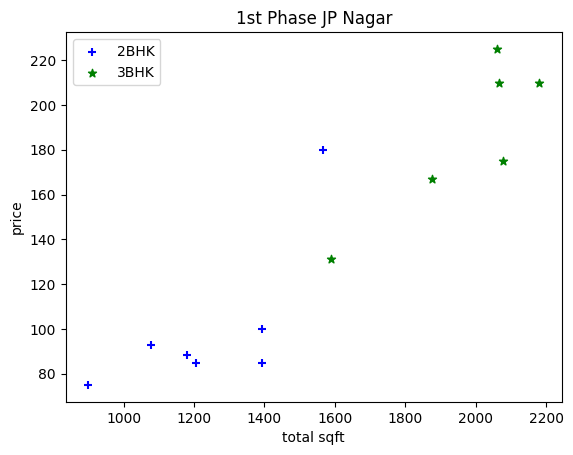

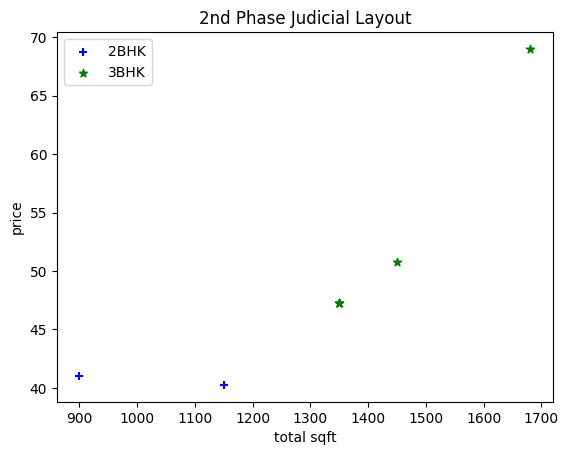

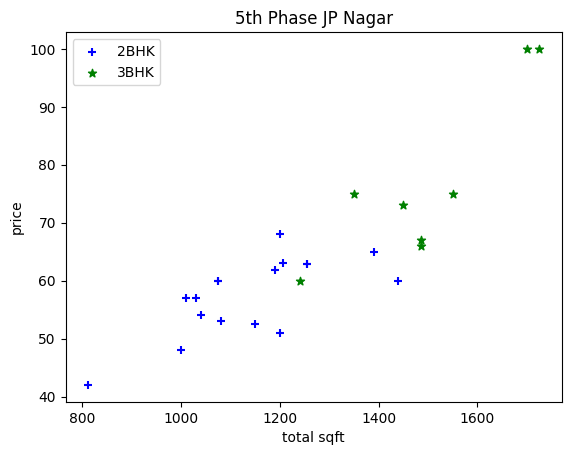

In [50]:
for loc in top_loc :
    plot_scatter_price_area(loc, df8)
    plt.show()

In [51]:
df7_hebbal = df7[df7.location == 'Hebbal']
df7_hebbal.head()

,location,total_sqft,bath,balcony,price,rooms,price_per_sqft
2640,Hebbal,1760.0,2.0,2.0,123.0,3,6988.636364
2641,Hebbal,5611.5,4.0,0.0,477.0,4,8500.400962
2642,Hebbal,1900.0,3.0,2.0,119.0,3,6263.157895
2643,Hebbal,1349.0,2.0,1.0,98.2,2,7279.466271
2644,Hebbal,2483.0,5.0,2.0,212.0,4,8538.058800


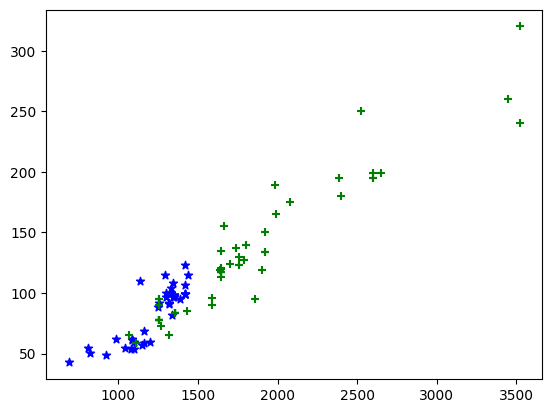

In [52]:
plt.scatter(df7_hebbal[df7_hebbal.rooms == 2].total_sqft, df7_hebbal[df7_hebbal.rooms == 2].price, marker = '*', color = 'blue')
plt.scatter(df7_hebbal[df7_hebbal.rooms == 3].total_sqft, df7_hebbal[df7_hebbal.rooms == 3].price, marker = '+', color = 'green')

In [53]:
df8_hebbal = df8[df8.location == 'Hebbal']
df8_hebbal.head()

,location,total_sqft,bath,balcony,price,rooms,price_per_sqft
2640,Hebbal,1760.0,2.0,2.0,123.0,3,6988.636364
2641,Hebbal,5611.5,4.0,0.0,477.0,4,8500.400962
2642,Hebbal,1900.0,3.0,2.0,119.0,3,6263.157895
2643,Hebbal,1349.0,2.0,1.0,98.2,2,7279.466271
2644,Hebbal,2483.0,5.0,2.0,212.0,4,8538.058800


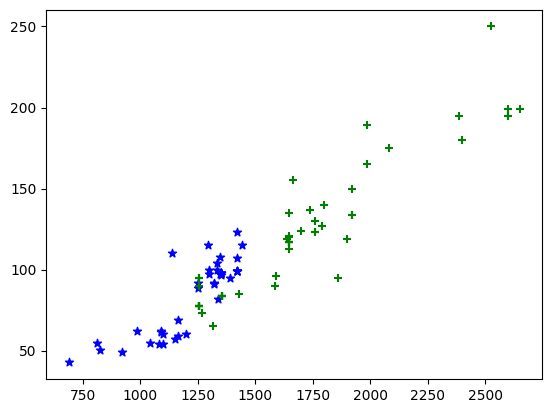

In [54]:
plt.scatter(df8_hebbal[df8_hebbal.rooms == 2].total_sqft, df8_hebbal[df8_hebbal.rooms == 2].price, marker = '*', color = 'blue')
plt.scatter(df8_hebbal[df8_hebbal.rooms == 3].total_sqft, df8_hebbal[df8_hebbal.rooms == 3].price, marker = '+', color = 'green')

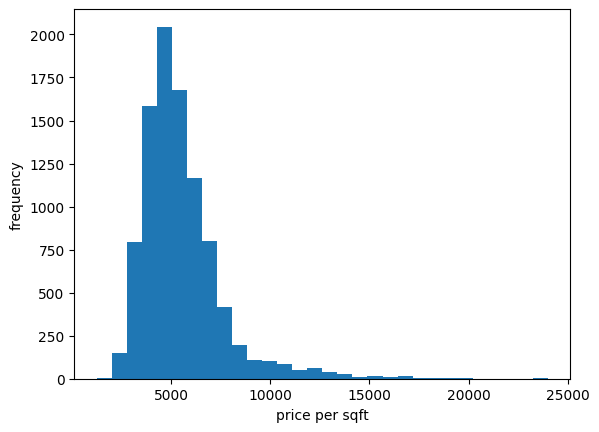

In [55]:
plt.hist(df8.price_per_sqft, bins = 30)
plt.xlabel('price per sqft')
plt.ylabel('frequency')
plt.show()

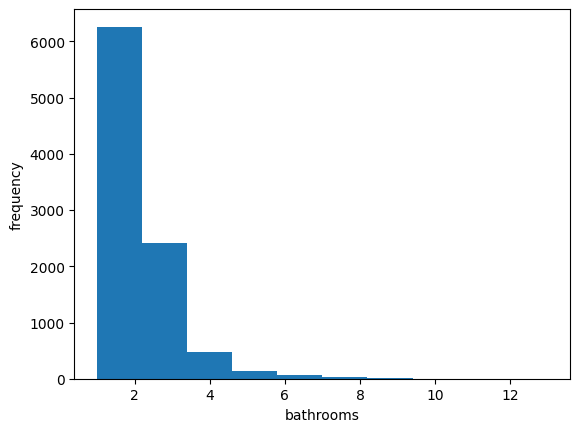

In [56]:
plt.hist(df8.bath)
plt.xlabel('bathrooms')
plt.ylabel('frequency')
plt.show()

In [57]:
#if bath - rooms > 2 drop
to_drop = df8[df8.bath - df8.rooms >= 2].index.values
df9 = df8.drop(index = to_drop)
df9.shape

(9325, 7)

We don't need price per sqft for training as we added that only for outlier detection now we can drop that

In [58]:
df10 = df9.drop('price_per_sqft', axis = 1)
df10.head()

,location,total_sqft,bath,balcony,price,rooms
0,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3


Now create dummy columns for location as data cannot be trained on string columns

In [59]:
dummies = pd.get_dummies(df10.location)
df10 = pd.concat([df10, dummies.drop('other', axis = 1)], axis = 1)
df10.head()

,location,total_sqft,bath,balcony,price,rooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,Devarachikkanahalli,1250.0,2.0,3.0,44.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Devarachikkanahalli,1250.0,2.0,2.0,40.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Devarachikkanahalli,1200.0,2.0,2.0,83.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Devarachikkanahalli,1170.0,2.0,2.0,40.0,2,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Devarachikkanahalli,1425.0,2.0,2.0,65.0,3,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [60]:
df10.drop('location', axis = 1, inplace = True)
df10.head()

,total_sqft,bath,balcony,price,rooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,3.0,44.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1250.0,2.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2.0,83.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,2.0,40.0,2,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,2.0,65.0,3,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [61]:
df10.shape

(9325, 240)

In [62]:
X = df10.drop('price', axis = 1)
Y = df10['price']

In [63]:
X.head()

,total_sqft,bath,balcony,rooms,Devarachikkanahalli,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1250.0,2.0,3.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1250.0,2.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1200.0,2.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1170.0,2.0,2.0,2,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1425.0,2.0,2.0,3,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [64]:
Y.head()

0    44.0
1    40.0
2    83.0
3    40.0
4    65.0
Name: price, dtype: float64

In [65]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [66]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_model.score(x_test, y_test)

0.7594250862783551

In [67]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 10)
cross_val_score(LinearRegression(),X, Y, cv = cv)

array([0.75942509, 0.83389947, 0.77087142, 0.82656963, 0.83047297])

Let's try which model fits best 
linear regression(L1, L2), svr (same as svm but for regression), knn(k nearest neigbours), desicion tree regressor 

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

In [74]:
model_params = {
    'linear_regression' : {
        'model' : LinearRegression(), 
        'params' : {
            'positive' : [True, False]
        }
    },
    'Lasso' : {
        'model' : Lasso(),
        'params' : {
            'alpha' : [0.1, 10],
            'max_iter' : [1000, 5000]
        }
    },
    'Ridge' : {
        'model' : Ridge(),
        'params' : {
            'alpha' : [0.1, 10],
            'max_iter' : [1000, 5000]
        }
    },
    # 'SVR' : {
    #     'model' : SVR(),
    #     'params' : {
    #         'kernel' : ['rbf', 'linear', 'sigmoid'],
    #         'gamma' : ['scale', 'auto'],
    #         'C' : [0.1, 5, 10]
    #     }
    # },
    'Decision Tree Regression' : {
        'model' : DecisionTreeRegressor(),
        'params' : {
            'criterion' : ['squared_error', 'poisson'],
            'splitter' : ['best', 'random']
        }
    }
    
}

In [75]:
from sklearn.model_selection import GridSearchCV
scores = []

In [76]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 10)
for model, params in model_params.items() :
    clf = GridSearchCV(params['model'], params['params'], cv = cv, return_train_score = False, verbose = 1)
    clf.fit(X, Y)
    print(f"{model} ✅")
    scores.append({
        'model' : model, 
        'best score' : clf.best_score_, 
        'best params' : clf.best_params_
    })
best_model = pd.DataFrame(scores, columns = ['model', 'best score', 'best params'])

Fitting 5 folds for each of 2 candidates, totalling 10 fits
linear_regression ✅
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Lasso ✅
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Ridge ✅
Fitting 5 folds for each of 4 candidates, totalling 20 fits
Decision Tree Regression ✅


In [77]:
best_model

,model,best score,best params
0,linear_regression,0.804248,{'positive': False}
1,Lasso,0.762817,"{'alpha': 0.1, 'max_iter': 1000}"
2,Ridge,0.804307,"{'alpha': 0.1, 'max_iter': 1000}"
3,Decision Tree Regression,0.661477,"{'criterion': 'poisson', 'splitter': 'best'}"


Hence linear regression is best model with 80 percent accuracy

In [78]:
X.columns

Index(['total_sqft', 'bath', 'balcony', 'rooms', ' Devarachikkanahalli',
       '1st Block Jayanagar', '1st Phase JP Nagar',
       '2nd Phase Judicial Layout', '2nd Stage Nagarbhavi',
       '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=239)

In [79]:
np.where(X.columns == '2nd Stage Nagarbhavi')

(array([8], dtype=int64),)

In [81]:
np.where(X.columns == '2nd Stage Nagarbhavi')[0][0]

8

In [90]:
def to_predict_price(location, sqft, bath, bhk) :
    loc_idx = np.where(X.columns == location)[0][0]
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[3] = bhk
    if(loc_idx >= 0) :
        x[loc_idx] = 1;
    data = pd.DataFrame([x], columns = X.columns)
    return lr_model.predict(data)

In [91]:
to_predict_price('2nd Phase Judicial Layout', 1000, 2, 2)

array([31.56303933])

In [93]:
to_predict_price('1st Phase JP Nagar',1000, 2, 2)

array([87.45448043])

In [94]:
to_predict_price('1st Phase JP Nagar',1000, 3, 3)

array([84.44902524])

In [95]:
to_predict_price('Indira Nagar',1000, 2, 2)

array([135.47271003])

In [96]:
to_predict_price('Indira Nagar',1000, 3, 3)

array([132.46725484])

In [97]:
import pickle
with open('house_price_prediction.pickle', 'wb') as f :
    pickle.dump(lr_model, f)

In [102]:
import json
with open('columns.json', 'w') as f:
    f.write(json.dumps(X.columns.tolist()))